# Classification
## - We are going to touch some algorithms.
    - KNN (K-nearest-neighbor)
    - Decision Tree
    - Support Vector Machine
    - Naive Bayes
    - Logistic Regression

## KNN
- is a method that doesn't have a learning fase
- is a non-parametric method: no assumption about data.
Instead, it looks at the data and output labels based on the mayority vote of its neighbors
- the algorithm requires two main factors  the number of neighbors (K)
to consider and the distance metric to calculate the similarity between data points


### **Lets Make an example**:

#### Setup
#### Environment Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

#### **Load the Dataset iris**

In [3]:
iris = datasets.load_iris()

In [1]:
df = pd.DataFrame({'Sepal length': iris.data[:,0],
                   'Sepal width': iris.data[:,1],
                   'Petal length':iris.data[:,2],
                   'Petal width':iris.data[:,3],
                   'Species':iris.target})
df.head()

NameError: name 'pd' is not defined

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


#### Visualize the data

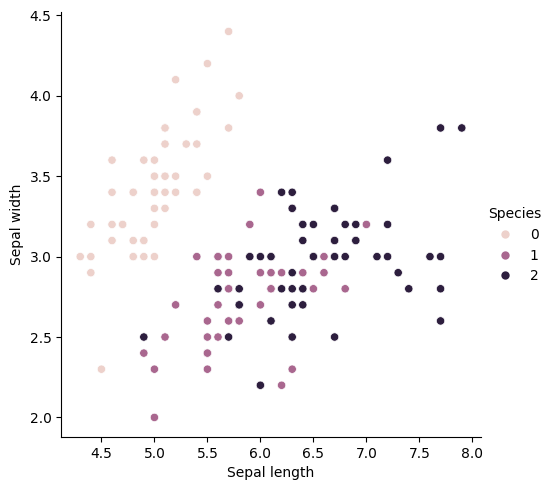

In [8]:
sns.relplot(data=df, x='Sepal length', y='Sepal width', hue='Species')

#### Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split

X = df[df.columns[:4]]
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [12]:
X_train[:5]

,Sepal length,Sepal width,Petal length,Petal width
34,4.9,3.1,1.5,0.2
110,6.5,3.2,5.1,2.0
58,6.6,2.9,4.6,1.3
120,6.9,3.2,5.7,2.3
68,6.2,2.2,4.5,1.5


#### Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train[:5]

array([[-1.11943963,  0.03313417, -1.23687165, -1.27464827],
       [ 0.83983483,  0.25402865,  0.80723146,  1.11531724],
       [ 0.96228949, -0.40865479,  0.52332825,  0.18588621],
       [ 1.32965345,  0.25402865,  1.14791531,  1.51364482],
       [ 0.47247087, -1.95491617,  0.46654761,  0.45143793]])

#### **K-Neares Neighbors**

In [15]:
k = 1

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 8  0  0]
 [ 0  9  0]
 [ 0  1 12]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.90      1.00      0.95         9
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667


#### Find the best K

In [19]:
def knn_tuning(k):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [20]:
knn_tuning(1)

0.9666666666666667

In [21]:
knn_tuning(5)

0.9666666666666667

In [22]:
knn_results = pd.DataFrame({'K':np.arange(1, len(X_train), 5)})

In [23]:
knn_results['K']

0       1
1       6
2      11
3      16
4      21
5      26
6      31
7      36
8      41
9      46
10     51
11     56
12     61
13     66
14     71
15     76
16     81
17     86
18     91
19     96
20    101
21    106
22    111
23    116
Name: K, dtype: int64

In [24]:
knn_results['Accuracy'] = knn_results['K'].apply(knn_tuning)
knn_results['Accuracy']

0     0.966667
1     0.966667
2     0.966667
3     0.933333
4     0.933333
5     0.933333
6     0.866667
7     0.800000
8     0.800000
9     0.833333
10    0.800000
11    0.766667
12    0.766667
13    0.766667
14    0.733333
15    0.566667
16    0.566667
17    0.566667
18    0.566667
19    0.566667
20    0.566667
21    0.566667
22    0.566667
23    0.566667
Name: Accuracy, dtype: float64

In [25]:
knn_results

,K,Accuracy
0,1,0.966667
1,6,0.966667
2,11,0.966667
3,16,0.933333
4,21,0.933333
5,26,0.933333
6,31,0.866667
7,36,0.800000
8,41,0.800000
9,46,0.833333


#### Optimize weights

In [26]:
def knn_tuning_uniform(k):
  classifier = KNeighborsClassifier(n_neighbors = k, weights= 'uniform')
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [27]:
def knn_tuning_distance(k):
  classifier = KNeighborsClassifier(n_neighbors = k, weights= 'distance')
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [28]:
knn_results['Uniform'] = knn_results['K'].apply(knn_tuning_uniform)
knn_results['Distance'] = knn_results['K'].apply(knn_tuning_distance)
knn_results

,K,Accuracy,Uniform,Distance
0,1,0.966667,0.966667,0.966667
1,6,0.966667,0.966667,0.966667
2,11,0.966667,0.966667,0.966667
3,16,0.933333,0.933333,0.933333
4,21,0.933333,0.933333,0.933333
5,26,0.933333,0.933333,0.933333
6,31,0.866667,0.866667,0.933333
7,36,0.800000,0.800000,0.900000
8,41,0.800000,0.800000,0.900000
9,46,0.833333,0.833333,0.900000


### **Lets do another example**:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [2]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **K-Neares Neighbors Model**

In [5]:
# Create a list of k values for KNN
k_values = [1, 5, 11, 15, 21]

# Train KNN models with different k values and store the results
knn_results = {}
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    knn_results[k] = {
        'model': knn_model,
        'y_pred': y_pred_knn,
        'accuracy': accuracy_score(y_test, y_pred_knn)
    }

#### **Radius Neighbors Model**

In [6]:
# Create a list of radius values for RNN
radius_values = [350, 400, 450, 500, 550, 600]

# Train RNN models with different radius values and store the results
rnn_results = {}
for radius in radius_values:
    rnn_model = RadiusNeighborsClassifier(radius=radius)
    rnn_model.fit(X_train, y_train)
    y_pred_rnn = rnn_model.predict(X_test)
    rnn_results[radius] = {
        'model': rnn_model,
        'y_pred': y_pred_rnn,
        'accuracy': accuracy_score(y_test, y_pred_rnn)
    }

#### Now compare the performance of KNN and RNN models.

In [7]:
# Print the accuracy of KNN models
print("KNN Accuracy:")
for k, result in knn_results.items():
    print(f"K = {k}: {result['accuracy']:.2f}")

# Print the accuracy of RNN models
print("\nRNN Accuracy:")
for radius, result in rnn_results.items():
    print(f"Radius = {radius}: {result['accuracy']:.2f}")


KNN Accuracy:
K = 1: 0.93
K = 5: 0.96
K = 11: 0.98
K = 15: 0.96
K = 21: 0.96

RNN Accuracy:
Radius = 350: 0.94
Radius = 400: 0.94
Radius = 450: 0.94
Radius = 500: 0.91
Radius = 550: 0.90
Radius = 600: 0.90


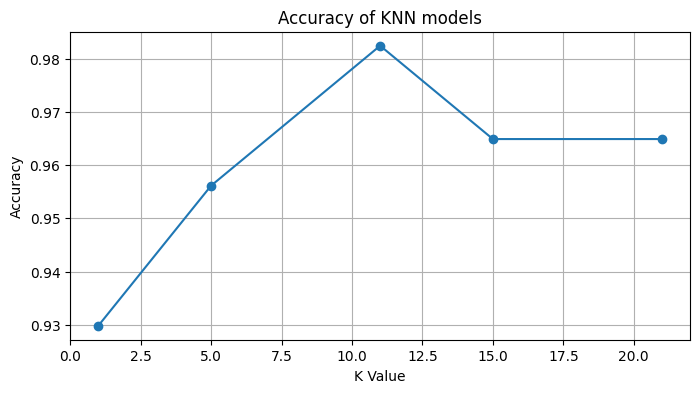

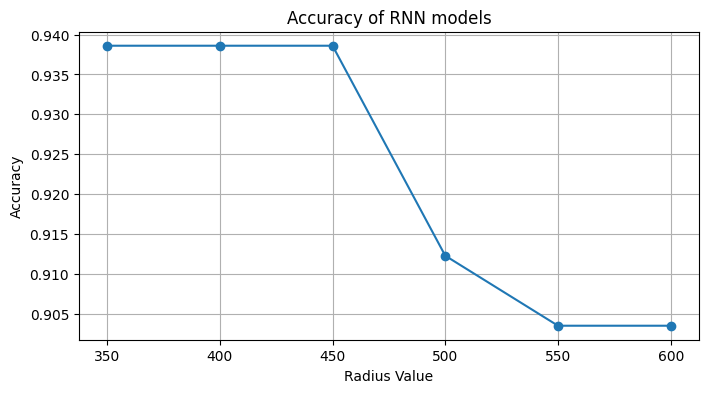

In [8]:
# Visualize the accuracy of KNN models
k_values = [k for k in knn_results.keys()]
k_accuracies = [result['accuracy'] for result in knn_results.values()]

plt.figure(figsize=(8, 4))
plt.plot(k_values, k_accuracies, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN models')
plt.grid(True)
plt.show()

# Visualize the accuracy of RNN models
radius_values = [radius for radius in rnn_results.keys()]
radius_accuracies = [result['accuracy'] for result in rnn_results.values()]

plt.figure(figsize=(8, 4))
plt.plot(radius_values, radius_accuracies, marker='o')
plt.xlabel('Radius Value')
plt.ylabel('Accuracy')
plt.title('Accuracy of RNN models')
plt.grid(True)
plt.show()


## Desicion Tree
- Basic Algorithm (a greedy algorithm)
And like a Algorithm Tree, in desicion Tree there are two kinds of nodes, the desicion node and the leaf node
- **Desicion Node**:
Each desicion node has a condition, and the condition is a question about the data
Each desicion node has two or more child nodes, each child node is a possible answer to
the question the child nodes that satifies the condition will put at the left of the root node
and the nodes that dont satifies the condition at the right of the root node
- **Leaf Node**:
Each leaf node is a possible answer to the question
Each leaf node has a value, the value is the answer to the question


### Lets make an example:

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()
dataset = pd.DataFrame(data=data['data'], columns=data['feature_names'])
dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
from sklearn.model_selection import train_test_split

X = dataset.copy()
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [17]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf = clf.fit(X_train, y_train)


In [18]:
predicts = clf.predict(X_test)
predicts

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0])

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, predicts)

0.925531914893617

In [20]:
confusion_matrix(y_test, predicts, labels=[0,1])

array([[ 55,   5],
       [  9, 119]])

## 

## Support Vector Machine

In Support Vector Machine we need to know some things
- The bias/variance tradeoff
- Cross Validation
So before start, lets get to know this prerequesites

### Bias/variance tradeoff
Bias and variance are two primary sources of error in machine learning models:

- Bias: Error resulting from overly simplistic assumptions made by the model in approximating the relationship between features and the target. A model with high bias is too simple and fails to capture the underlying patterns in the data, leading to underfitting.

- Variance: Error caused by the model being overly sensitive to small fluctuations in the training data. A model with high variance fits the training data too closely, capturing noise, which results in overfitting.

### Now we can start with support vector machines (SVM)